<a href="https://colab.research.google.com/github/samanthahorta/ActuarialScienceProjects_Python/blob/main/MultipleLinearRegression_BostonHousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

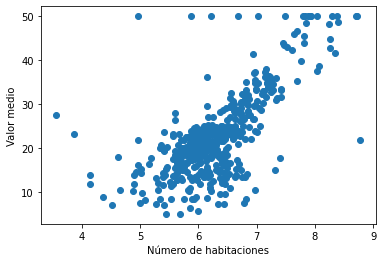

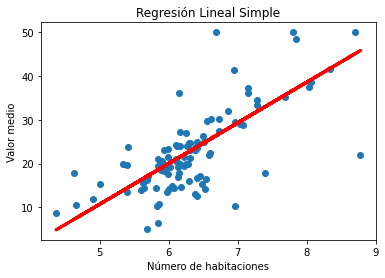


DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[9.29052718]
Valor de la intersección o coeficiente "b":
-35.752545654144775

Precisión del modelo:
0.4808749992150141


In [ ]:
"""
#Regresión Lineal Simple
"""

import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


boston = datasets.load_boston()
print(boston)
print()

print('Información en el dataset:')
print(boston.keys())
print()

print('Características del dataset:')
print(boston.DESCR)

print('Cantidad de datos:')
print(boston.data.shape)
print()

print('Nombres columnas:')
print(boston.feature_names)

########## REGRESIÓN LINEAL SIMPLE ##########

X = boston.data[:, np.newaxis, 5]


y = boston.target


plt.scatter(X, y)
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

########## IMPLEMENTACIÓN DE REGRESIÓN LINEAL SIMPLE ##########

# Implementación Machine learning 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

#Realizo una predicción
Y_pred = lr.predict(X_test)

#Graficamos los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

print()
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)

print()
print('Precisión del modelo:')
print(lr.score(X_train, y_train))

PROPUESTA AJUSTE REGRESIÓN LINEAL MULTIPLE

In [ ]:
import pandas as pd
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['y'] = boston.target
data.head(5)
y = boston.target

X = data[['CRIM','ZN', 'CHAS' ,'NOX', 'RM', 'DIS', 'RAD' ,'TAX', 'PTRATIO'
, 'B', 'LSTAT']]
y =data['y']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
modelo.summary2()
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

El error (rmse) de test es: 4.881038743851974
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     93.84
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.51e-102
Time:                        01:29:36   Log-Likelihood:                -1197.2
No. Observations:                 404   AIC:                             2418.
Df Residuals:                     392   BIC:                             2466.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 